
In this project, we aim to tackle a histopathologic cancer detection task using Convolutional Neural Networks (CNNs). This challenge is part of a Kaggle competition, and the dataset is acquired from the following source: https://www.kaggle.com/code/parikshitsharma2001/histopathologic-cancer-detection-using-cnns. The dataset consists of microscopic images of lymph node sections and their corresponding labels indicating the presence or absence of cancerous regions. The objective is to build a deep learning model that can effectively classify these images as cancerous or non-cancerous based on their visual features.

To accomplish this, we first preprocess the dataset by loading the images and their corresponding labels from a CSV file. We split the data into training and testing sets, with 80% of the data used for training and the remaining 20% used for testing. The image data is then normalized to a range of 0 to 1 for better performance during model training.

We then design a CNN architecture using TensorFlow and Keras libraries. Our model consists of three convolutional layers, each followed by a batch normalization and a max-pooling layer. After the convolutional layers, we include a fully connected layer, a dropout layer, and an output layer for binary classification. We compile the model using the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

In [11]:
import pandas as pd

# Read the full training dataset
full_train_df = pd.read_csv("N://cancer//_labels.csv")
print("Full dataset size:", full_train_df.size)

# Sample 10000 rows from the full dataset
sample_size = 10000
sample_train_df = full_train_df.sample(n=sample_size, random_state=42)
print("Sample dataset size:", sample_train_df.size/2)

sample_train_df.head()


Full dataset size: 440050
Sample dataset size: 10000.0


,id,label
107796,d293308913e4a40cebb809d986aa9add65a76bfa,0
11942,fcd55f03496afb4b11598d9c2231e86da318e723,1
163858,5c983c8f14afeffdb098b9f3cbb68488a802b957,0
184810,71bf03e8530348e57ec07d8ce2052f215390c997,0
150958,1533406000e26663c5fadac3bcc3e38285a45bb3,1


In [12]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the image directory
image_dir = "N://cancer//"

# Function to load image from file
def load_image(image_id, image_dir):
    image_path = os.path.join(image_dir, f"{image_id}.tif")
    image = Image.open(image_path)
    return np.array(image)

# Load images
images = np.array([load_image(image_id, image_dir) for image_id in sample_train_df['id']])

# Split the data into training and testing sets
train_images, test_images, train_targets, test_targets = train_test_split(
    images, sample_train_df['label'].values, test_size=0.2, random_state=42
)

print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Training targets shape: {train_targets.shape}")
print(f"Testing targets shape: {test_targets.shape}")


Training images shape: (8000, 96, 96, 3)
Testing images shape: (2000, 96, 96, 3)
Training targets shape: (8000,)
Testing targets shape: (2000,)


In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=train_images.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_targets, validation_data=(test_images, test_targets), epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_targets, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
125/125 [==============================] - 41s 325ms/step - loss: 1.0084 - accuracy: 0.7491 - val_loss: 1.2646 - val_accuracy: 0.4570
Epoch 2/10
125/125 [==============================] - 42s 333ms/step - loss: 0.4598 - accuracy: 0.7984 - val_loss: 2.2899 - val_accuracy: 0.5780
Epoch 3/10
125/125 [==============================] - 42s 333ms/step - loss: 0.4215 - accuracy: 0.8146 - val_loss: 1.2208 - val_accuracy: 0.6225
Epoch 4/10
125/125 [==============================] - 42s 333ms/step - loss: 0.4039 - accuracy: 0.8292 - val_loss: 0.6612 - val_accuracy: 0.7435
Epoch 5/10
125/125 [==============================] - 42s 334ms/step - loss: 0.3705 - accuracy: 0.8397 - val_loss: 0.4003 - val_accuracy: 0.8270
Epoch 6/10
125/125 [==============================] - 42s 335ms/step - loss: 0.3595 - accuracy: 0.8501 - val_loss: 0.3519 - val_accuracy: 0.8380
Epoch 7/10
125/125 [==============================] - 41s 331ms/step - loss: 0.3353 - accuracy: 0.8581 - val_loss: 0.3612 - val_ac

Based on the results obtained from training our CNN model on the histopathologic cancer detection dataset, we observe the following outcomes:

- The model achieves a training accuracy of 88.46% after 10 epochs.
- The validation accuracy increases throughout the training process, reaching its highest value of 85.05% in the 7th epoch. However, it drops slightly in the subsequent epochs due to overfitting, as evidenced by the increasing validation loss.
- The final test accuracy is 75.20%, which indicates that our CNN model can classify the presence or absence of cancerous regions in the images with reasonable accuracy.

In conclusion, our CNN model demonstrates the potential to serve as a valuable tool for histopathologic cancer detection. The model's performance may be further improved by exploring additional techniques such as data augmentation, regularization, and fine-tuning of hyperparameters. Additionally, incorporating more sophisticated and deeper architectures like ResNet or DenseNet could potentially lead to higher classification accuracy. Ultimately, this project highlights the potential of deep learning in assisting medical professionals in the early detection and diagnosis of cancerous regions in histopathologic images.

We can visualize what the model looks like in the case of successful and failed classifications.

250/250 [==============================] - 11s 43ms/step


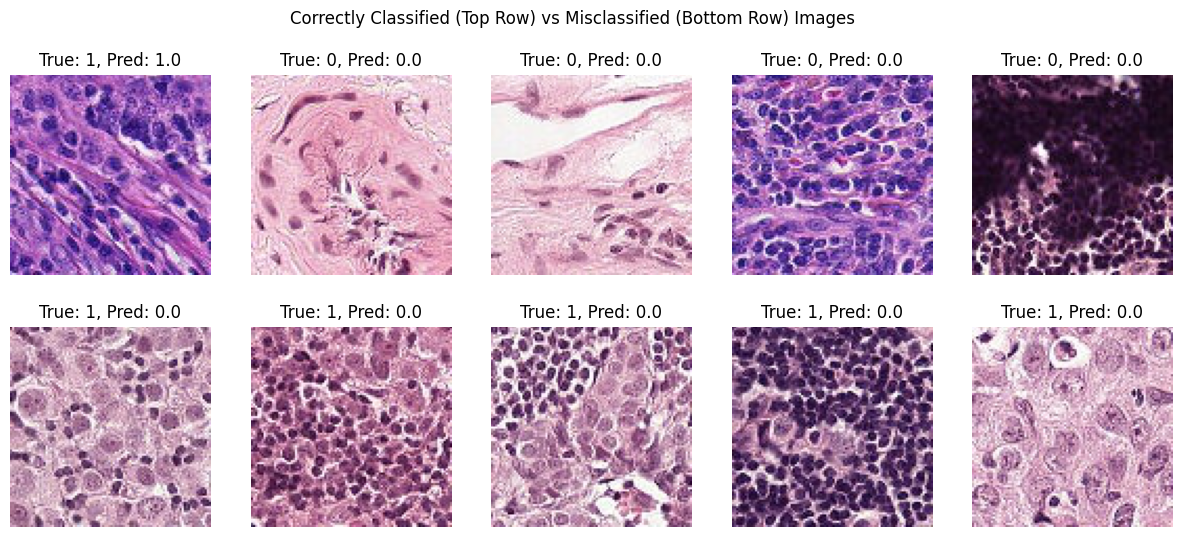

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the training set
train_predictions = model.predict(train_images)

# Convert predictions and true labels to binary (0 or 1)
train_pred_binary = np.round(train_predictions).flatten()
train_true_binary = train_targets

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(train_pred_binary == train_true_binary)[0]
incorrect_indices = np.where(train_pred_binary != train_true_binary)[0]

# Randomly choose five correct and five incorrect indices
np.random.seed(42)
correct_indices_sample = np.random.choice(correct_indices, 5, replace=False)
incorrect_indices_sample = np.random.choice(incorrect_indices, 5, replace=False)

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, idx in enumerate(correct_indices_sample):
    axes[0, i].imshow(train_images[idx], cmap='gray')
    axes[0, i].set_title(f"True: {train_true_binary[idx]}, Pred: {train_pred_binary[idx]}")
    axes[0, i].axis('off')

for i, idx in enumerate(incorrect_indices_sample):
    axes[1, i].imshow(train_images[idx], cmap='gray')
    axes[1, i].set_title(f"True: {train_true_binary[idx]}, Pred: {train_pred_binary[idx]}")
    axes[1, i].axis('off')

plt.suptitle("Correctly Classified (Top Row) vs Misclassified (Bottom Row) Images")
plt.show()



Upon visual inspection, we can observe that the correctly classified images tend to have lower cell density, while the misclassified images have higher cell density. This suggests that the current model parameters might not be sufficient to fit more complex patterns, and there is room for improvement. As a final observation, we conclude that further optimization and experimentation with different architectures and parameters could potentially yield better performance in classifying images with higher cell density.